                                           Fuzzy Clustering - ML               

# Fuzzy Clustering - ML

Fuzzy clustering allows each data point to belong to multiple clusters with different membership values. Instead of assigning a point to just one group, it captures how strongly a point relates to each cluster.

* Uses membership scores between 0 and 1
* Handles overlapping or unclear cluster boundaries
* More flexible than hard clustering methods
* Useful when data points don’t fit neatly into a single group

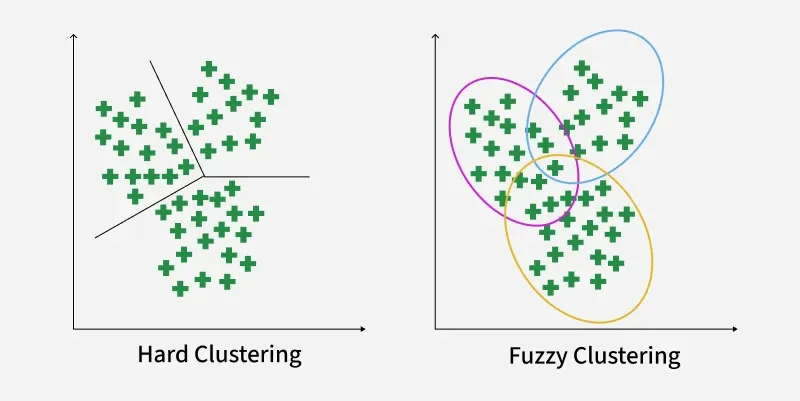

## Working of Fuzzy Clustering

1. **Initialization**: Start with initial cluster centers and a fuzziness parameter (m > 1).
2. **Membership Calculation**: For each data point, calculate its membership score for each cluster based on distance to cluster centers and the fuzziness parameter.
3. **Update Cluster Centers**: Recalculate cluster centers using the membership scores, giving more weight to points with higher membership.
4. **Iterate**: Repeat the process until cluster centers stabilize or a maximum number of iterations is reached.



## Implementation of Fuzzy Clustering

In [1]:
# pip install scikit-fuzzy

# Step 1: Importing Libraries

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [2]:
# Step 2: Generating Sample Data
np.random.seed(0)
center = 0.5
spread = 0.1

data = center + spread * np.random.randn(2, 100)

data = np.clip(data, 0, 1)

In [3]:
# Step 3: Setting Fuzzy C-Means Parameters

n_clusters = 3
m = 1.7
error = 1e-5
maxiter = 2000

In [4]:
# Step 4: Performing Fuzzy C-Means Clustering and Assign Each Point to a Hard Cluster

cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None
)

hard_clusters = np.argmax(u, axis=0)

In [5]:
# # Step 5: Printing Cluster Centers and Membership Matrix
print("Cluster Centers:\n", cntr)
print("\nFuzzy Membership Matrix (first 5 data points):")
print(u[:, :5])

Cluster Centers:
 [[0.40427944 0.44688713]
 [0.57608357 0.43108734]
 [0.53151692 0.61555506]]

Fuzzy Membership Matrix (first 5 data points):
[[0.0753945  0.103008   0.03041289 0.09668828 0.07004986]
 [0.16579475 0.86917327 0.95209853 0.36321813 0.85265308]
 [0.75881075 0.02781873 0.01748858 0.54009359 0.07729706]]


## Step 6: Visualizing Fuzzy Memberships and Hard Clusters

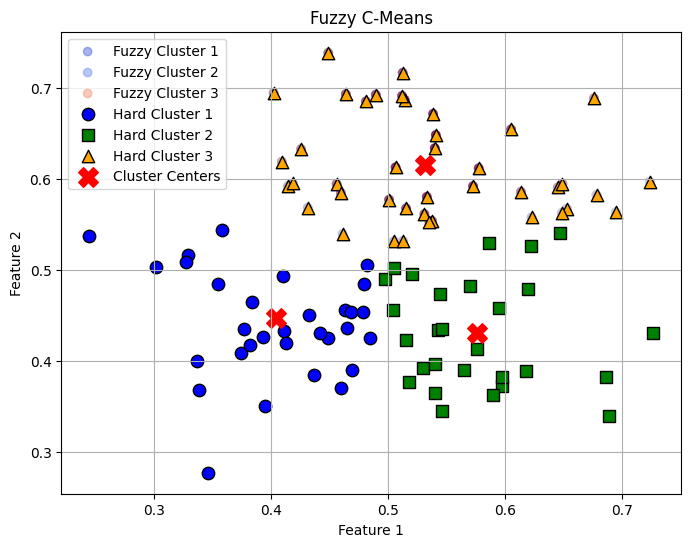

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(data[0], data[1], c=u[i], cmap='coolwarm',
               alpha=0.5, label=f'Fuzzy Cluster {i+1}')

markers = ['o', 's', '^']
colors = ['blue', 'green', 'orange']
for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(cluster_points[0], cluster_points[1], c=colors[i],
               marker=markers[i], edgecolor='k', s=80, label=f'Hard Cluster {i+1}')

ax.scatter(cntr[:, 0], cntr[:, 1], c='red',
           marker='X', s=200, label='Cluster Centers')

ax.set_title('Fuzzy C-Means')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
plt.grid(True)
plt.show()

## Applications

* Image Segmentation
* Customer Segmentation
* Anomaly Detection
* Bioinformatics

## Advantages

* Captures uncertainty and overlapping clusters
* More flexible than hard clustering
* Can provide richer insights into data structure   

## Limitations

* More computationally intensive than hard clustering
* Choosing the right fuzziness parameter can be challenging
* May not perform well with high-dimensional data without proper preprocessing

